# State-level prison pop by race

Data downloaded here:
    
    https://www.ojjdp.gov/ojstatbb/ezacjrp/asp/State_Race.asp
    
    
# CAUTION

The state column is titled "State of Offense", so I'm not sure whether these are exactly the same state prison populations.

# Data restructuring stuff

You can safely ignore this section, it's not part of the analysis.

In [7]:
import pandas as pd

In [8]:
class Report(object):
    
    def __init__(self, fname):
    
        fh = open(fname)
    
        clean_line = lambda x: x.strip().strip('"')
        self.data_source = clean_line(fh.readline())
        
    
        (subgroup, year) = clean_line(fh.readline()).split(", ")
        
        self.subgroup = subgroup
        self.year = int(year)
        
        fh.close()   
        
        self.df = pd.read_csv(
            fname,
            skiprows=3,
            index_col=False
        ).set_index("State of Offense").dropna(how="all")
        
        self.df["year"] = self.year
        
        for c in self.df.columns:
            self.df[c] = pd.to_numeric(self.df[c].apply(lambda x: str(x).replace(",","")))
        
        self.df["white_pct"] = self.df["White"] / self.df["Total"]
    
        self.df = self.df.reset_index().set_index(["State of Offense","year"])
    #return pd.read_csv(fname,skiprows=3,index_col=False)
    
report = Report("data/1997-ezacjrp_export.csv")
print report.data_source
print report.subgroup
report.df.head()

Easy Access to the Census of Juveniles in Residential Placement
Race/Ethnicity by State


,,Total,White,Black,Hispanic,American Indian,Asian,Other,white_pct
State of Offense,year,,,,,,,,
United States,1997,105055,39445,41896,19322,1615,2215,562.0,0.375470
Alabama,1997,1686,636,1026,15,3,3,0.0,0.377224
Alaska,1997,351,162,33,12,129,12,0.0,0.461538
Arizona,1997,1869,771,198,792,87,9,12.0,0.412520
Arkansas,1997,603,243,351,9,0,0,3.0,0.402985


In [9]:
import os

def get_all():

    frames = []
    for fname in os.listdir("data"):
        frames.append(Report(os.path.join("data",fname)).df.reset_index())
        
    return pd.concat(frames).set_index(["State of Offense","year"])

df = get_all()



## Trends for CT



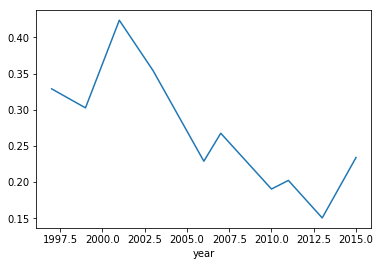

In [10]:
%matplotlib inline
df.loc["Connecticut"]["white_pct"].sort_index().plot()

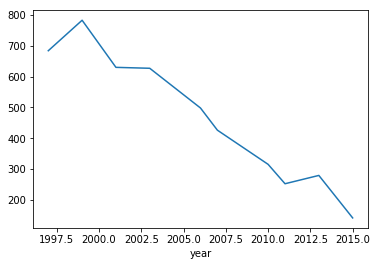

In [11]:
df.loc["Connecticut"]["Total"].sort_index().plot()#.to_frame().plot(ylim=(0,1))

In [12]:
df.loc["Connecticut"].sort_index()

,Total,White,Black,Hispanic,American Indian,Asian,Other,white_pct
year,,,,,,,,
1997,684,225,279,168,0.0,3.0,9.0,0.328947
1999,783,237,297,219,3.0,12.0,15.0,0.302682
2001,630,267,198,156,3.0,6.0,3.0,0.423810
2003,627,222,246,129,6.0,3.0,21.0,0.354067
2006,498,114,219,144,3.0,0.0,15.0,0.228916
2007,426,114,180,114,3.0,3.0,15.0,0.267606
2010,315,60,150,90,3.0,0.0,12.0,0.190476
2011,252,51,117,75,0.0,0.0,6.0,0.202381
2013,279,42,141,90,0.0,3.0,3.0,0.150538
